# Recommendation Engine

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:

ratings = pd.read_csv("/home/kolade/Documents/Datasets/ratings.csv")
ratings.head()



,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [20]:
movies = pd.read_csv("/home/kolade/Documents/Datasets/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
#Combining movie ratings & movie names
ratings = pd.merge(ratings[['userId','movieId','rating']],movies[['movieId','title']],
                   how='left',left_on ='movieId' ,right_on = 'movieId')


rp = ratings.pivot_table(columns = ['movieId'],index = ['userId'],values = 'rating')
rp = rp.fillna(0)

# Converting pandas dataframe to numpy for faster execution in loops etc.
rp_mat = rp.as_matrix()


/home/kolade/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [24]:
type(rp_mat)

numpy.ndarray

### Content Based Filtering

####  Cosine Similarity

In [25]:
from scipy.spatial.distance import cosine


#The cosine of the angle between them is about 0.822.
a= np.asarray( [2, 1, 0, 2, 0, 1, 1, 1])
b = np.asarray( [2, 1, 1, 1, 1, 0, 1, 1])

print("\n\n")
print ("Cosine similarity between A and B is",round(1-cosine(a,b),4))





Cosine similarity between A and B is 0.8216


In [29]:
# User similarity matrix
mat_users = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        if i != j:
            mat_users[i][j] = (1- cosine(rp_mat[i,:], rp_mat[j,:]))
        else:
            mat_users[i][j] = 0.
            
pd_users = pd.DataFrame(mat_users,index =rp.index ,columns= rp.index )

In [30]:
m, n = rp.shape

In [34]:
# Finding similar users
def topn_simusers(uid = 16,n=5):
    users = pd_users.loc[uid,:].sort_values(ascending = False)
    topn_users = users.iloc[:n,]
    topn_users = topn_users.rename('score')    
    print ("Similar users as user:",uid)
    return pd.DataFrame(topn_users)

topn_simusers(uid=17,n=10) 


Similar users as user: 17


,score
userId,
596,0.379128
23,0.374641
355,0.329605
430,0.328872
608,0.319770
509,0.319313
105,0.309477
457,0.308201
15,0.307179


In [33]:
# Finding most rated movies of a user
def topn_movieratings(uid = 355,n_ratings=10):    
    uid_ratings = ratings.loc[ratings['userId']==uid]
    uid_ratings = uid_ratings.sort_values(by='rating',ascending = [False])
    print ("Top",n_ratings ,"movie ratings of user:",uid)
    return uid_ratings.iloc[:n_ratings,]    

topn_movieratings(uid=596,n_ratings=10)

Top 10 movie ratings of user: 596


,userId,movieId,rating,title
89645,596,4262,5.0,Scarface (1983)
89732,596,6874,5.0,Kill Bill: Vol. 1 (2003)
89353,596,194,5.0,Smoke (1995)
89546,596,2329,5.0,American History X (1998)
89453,596,1193,5.0,One Flew Over the Cuckoo's Nest (1975)
89751,596,8132,5.0,Gladiator (1992)
89579,596,2858,5.0,American Beauty (1999)
89365,596,296,5.0,Pulp Fiction (1994)
89587,596,2959,5.0,Fight Club (1999)
89368,596,318,5.0,"Shawshank Redemption, The (1994)"


In [41]:
#DO NOT RUN
#DO NOT RUN
#DO NOT RUN
#DO NOT RUN

# Movie similarity matrix

import time
start_time = time.time()
mat_movies = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i!=j:
            mat_movies[i,j] = (1- cosine(rp_mat[:,i], rp_mat[:,j]))
        else:
            mat_movies[i,j] = 0.
print("--- %s seconds ---" % (time.time() - start_time))



--- 3808.587711572647 seconds ---


In [46]:
pd_movies = pd.DataFrame(mat_movies,index =rp.columns ,columns= rp.columns )


pd_movies.to_csv(r'/home/kolade/Documents/Datasets/pd_movies.csv',sep=',')

    

In [48]:
pd_movies = pd.read_csv(r'/home/kolade/Documents/Datasets/pd_movies.csv',index_col='movieId')

In [49]:

# Finding similar movies
def topn_simovies(mid = 588,n=15):
    mid_ratings = pd_movies.loc[mid,:].sort_values(ascending = False)
    topn_movies = pd.DataFrame(mid_ratings.iloc[:n,])
    topn_movies['index1'] = topn_movies.index
    topn_movies['index1'] = topn_movies['index1'].astype('int64')
    topn_movies = pd.merge(topn_movies,movies[['movieId','title']],how = 'left',left_on ='index1' ,right_on = 'movieId')
    print ("Movies similar to movie id:",mid,",",movies['title'][movies['movieId']==mid].to_string(index=False),",are")
    del topn_movies['index1']
    return topn_movies


In [50]:
topn_simovies(mid=589,n=15)

Movies similar to movie id: 589 , Terminator 2: Judgment Day (1991) ,are


,589,movieId,title
0,0.702256,480,Jurassic Park (1993)
1,0.636392,1240,"Terminator, The (1984)"
2,0.633428,110,Braveheart (1995)
3,0.619415,356,Forrest Gump (1994)
4,0.614814,377,Speed (1994)
5,0.605887,380,True Lies (1994)
6,0.604555,457,"Fugitive, The (1993)"
7,0.591071,593,"Silence of the Lambs, The (1991)"
8,0.579325,367,"Mask, The (1994)"
9,0.577299,1036,Die Hard (1988)


### Collaborative filtering using ALS

In [51]:

rp = ratings.pivot_table(columns = ['movieId'],index = ['userId'],values = 'rating')
rp = rp.fillna(0)

A = rp.values

print ("\nShape of Original Sparse Matrix",A.shape)



Shape of Original Sparse Matrix (671, 9066)


In [52]:


W = A>0.5
W[W==True]=1
W[W==False]=0
W = W.astype(np.float64,copy=False)


W_pred = A<0.5
W_pred[W_pred==True]=1
W_pred[W_pred==False]=0
W_pred = W_pred.astype(np.float64,copy=False)
np.fill_diagonal(W_pred,val=0)


In [53]:
# Parameters
m,n = A.shape

n_iterations = 200
n_factors = 100
lmbda = 0.1

X = 5 * np.random.rand(m,n_factors)
Y = 5* np.random.rand(n_factors,n)


In [54]:


def get_error(A, X, Y, W):
    return np.sqrt(np.sum((W * (A - np.dot(X, Y)))**2)/np.sum(W))


In [55]:
errors = []
for itr in range(n_iterations):
    X = np.linalg.solve(np.dot(Y,Y.T)+ lmbda * np.eye(n_factors),np.dot(Y,A.T)).T
    Y = np.linalg.solve(np.dot(X.T,X)+ lmbda * np.eye(n_factors),np.dot(X.T,A))
    
    if itr%10 == 0:
        print(itr," iterations completed","RMSError value is:",get_error(A,X,Y,W))
                 
    errors.append(get_error(A,X,Y,W))

0  iterations completed RMSError value is: 3.208884896395556
10  iterations completed RMSError value is: 1.7180512960063081
20  iterations completed RMSError value is: 1.7077357029445945
30  iterations completed RMSError value is: 1.7036891103508633
40  iterations completed RMSError value is: 1.701539221691601
50  iterations completed RMSError value is: 1.7002188070822677
60  iterations completed RMSError value is: 1.6993302542517335
70  iterations completed RMSError value is: 1.6986890211571088
80  iterations completed RMSError value is: 1.6981981098549535
90  iterations completed RMSError value is: 1.697804633659468
100  iterations completed RMSError value is: 1.6974791817363892
110  iterations completed RMSError value is: 1.6972044895274285
120  iterations completed RMSError value is: 1.6969695234205653
130  iterations completed RMSError value is: 1.6967666083261992
140  iterations completed RMSError value is: 1.6965900585353724
150  iterations completed RMSError value is: 1.6964354

RMSError of rated movies:  1.6959005094089852


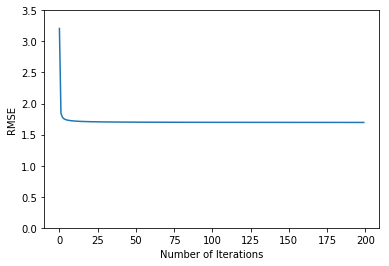

In [56]:
A_hat = np.dot(X,Y)
print ("RMSError of rated movies: ",get_error(A,X,Y,W))
    

plt.plot(errors);
plt.ylim([0, 3.5]);
plt.xlabel("Number of Iterations");plt.ylabel("RMSE")
#plt.title("No.of Iterations vs. RMSE")
plt.show()





In [57]:
def print_recommovies(uid=315,n_movies=15,pred_mat = A_hat,wpred_mat = W_pred ):
    pred_recos = pred_mat*wpred_mat
    pd_predrecos = pd.DataFrame(pred_recos,index =rp.index ,columns= rp.columns )
    pred_ratings = pd_predrecos.loc[uid,:].sort_values(ascending = False)
    pred_topratings = pred_ratings[:n_movies,]
    pred_topratings = pred_topratings.rename('pred_ratings')  
    pred_topratings = pd.DataFrame(pred_topratings)
    pred_topratings['index1'] = pred_topratings.index
    pred_topratings['index1'] = pred_topratings['index1'].astype('int64')
    pred_topratings = pd.merge(pred_topratings,movies[['movieId','title']],how = 'left',left_on ='index1' ,right_on = 'movieId')
    del pred_topratings['index1']    
    print ("\nTop",n_movies,"movies predicted for the user:",uid," based on collaborative filtering\n")
    return pred_topratings


predmtrx = print_recommovies(uid=355,n_movies=10,pred_mat=A_hat,wpred_mat=W_pred)
print (predmtrx)


Top 10 movies predicted for the user: 355  based on collaborative filtering

   pred_ratings  movieId                                title
0      2.472826     1923  There's Something About Mary (1998)
1      2.282529     1213                    Goodfellas (1990)
2      2.225793     5010               Black Hawk Down (2001)
3      2.132180     1197           Princess Bride, The (1987)
4      1.954779     2987      Who Framed Roger Rabbit? (1988)
5      1.940477     8798                    Collateral (2004)
6      1.940202     8622               Fahrenheit 9/11 (2004)
7      1.884670     5903                   Equilibrium (2002)
8      1.877320     8957                           Saw (2004)
9      1.834860     3702                       Mad Max (1979)
